In [1]:
import os
import datetime

import cv2
import numpy as np

import matplotlib.pyplot as plt

import onnx
import onnxruntime

# Load Picture

In [2]:
imgs_dir = './internet_imgs/'

imgs_list = [imgs_dir + img_name for img_name in os.listdir(imgs_dir)]

In [3]:
for img in imgs_list:
    print(img)

./internet_imgs/OIP.jpg
./internet_imgs/aerial-photography-of-forest-fire-and-smoke.jpg
./internet_imgs/R.jpg
./internet_imgs/OIP (8).jpg
./internet_imgs/OIP (4).jpg
./internet_imgs/OIP (11).jpg
./internet_imgs/OIP (12).jpg
./internet_imgs/OIP (3).jpg
./internet_imgs/5788580919_c75153a14c_b.jpg
./internet_imgs/OIP (7).jpg
./internet_imgs/OIP (5).jpg
./internet_imgs/OIP (9).jpg
./internet_imgs/OIP (10).jpg
./internet_imgs/OIP (2).jpg
./internet_imgs/OIP (6).jpg
./internet_imgs/OIP (1).jpg


## Function to Load Picture for Inference

In [16]:
def load_img(filename):
    
    w = 224
    h = 224
    dim = (w, h)
    
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dim)
    img = img / 256.
    img = np.transpose(img, (2, 0, 1))
    
    
    return img

In [31]:
def plot_img(img):
    
    fig, ax = plt.subplots(figsize=(3,3))
    plt.imshow(img.transpose(1, 2, 0))
    plt.show()

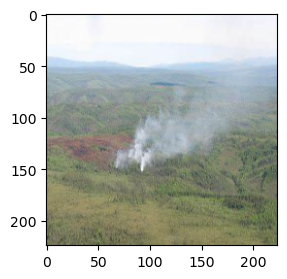

In [32]:
plot_img(load_img(imgs_list[0]))

# Load ONNX Model

In [22]:
model_name = './models/onnx_fasdd/medium_fassd__conv341_big__epoch=93.onnx'

# model_fasdd_med = onnx.load(model_name)
# onnx.checker.check_model(model_fasdd_med)

ort_session = onnxruntime.InferenceSession(model_name, providers=["CPUExecutionProvider"])

# Inference

### Sigmoid

In [42]:
def sigmoid_function(z):
    """ 
    this function implements the sigmoid function, and 
    expects a numpy array as argument 
    """
    
    if isinstance(z, np.ndarray):
        pass
    else:
        print("Wrong argument")
    
    sigmoid = 1.0/(1.0 + np.exp(-z))
    return sigmoid 

### Prediction

ONNX returns a list with [[probs], dtype], so it must be indexed to access each prob.

In [87]:
def predict(img):
    
    img_pred = np.expand_dims(img, axis=0).astype(np.float32)
    ort_inputs = {ort_session.get_inputs()[0].name: img_pred}
    yhat = np.array(ort_session.run(None, ort_inputs)[0][0])
    
    probs = sigmoid_function(yhat)
    smoke = "True" if yhat[0] > 0 else "False"
    fire = "True" if yhat[1] > 0 else "False"
    print("Smoke =".ljust(8) + f'{smoke}'.ljust(6) + "- Prob = " + f'{100*probs[0]:.2f} %'.rjust(8) + '\n' + 
          "Fire =".ljust(8) + f'{fire}'.ljust(6) + "- Prob = " + f'{100*probs[1]:.2f} %'.rjust(8))
    
    plot_img(img)

Smoke = True  - Prob =  96.96 %
Fire =  False - Prob =   1.52 %


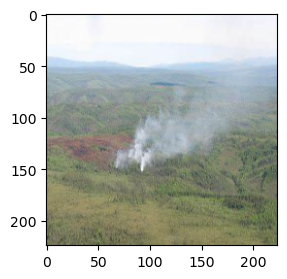

In [88]:
predict(load_img(imgs_list[0]))

Smoke = True  - Prob =  84.34 %
Fire =  False - Prob =   3.92 %


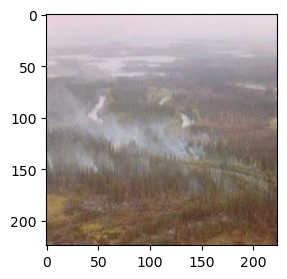

In [105]:
predict(load_img(imgs_list[15]))

Smoke = False - Prob =  19.25 %
Fire =  False - Prob =   0.17 %


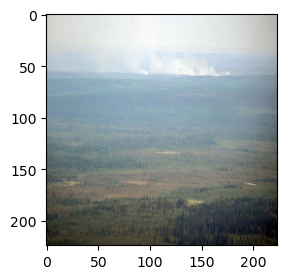

In [106]:
predict(load_img(imgs_list[2]))

Smoke = False - Prob =  47.37 %
Fire =  False - Prob =   9.11 %


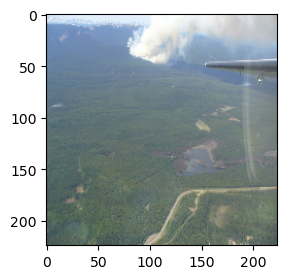

In [112]:
predict(load_img(imgs_list[8]))

Smoke = False - Prob =  36.03 %
Fire =  False - Prob =   0.11 %


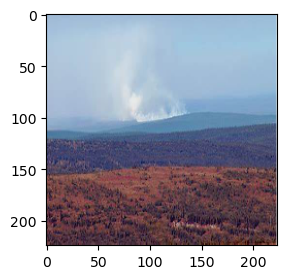

In [113]:
predict(load_img(imgs_list[9]))